Draft notebook for combininig the GJ 674 spectrum.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

20190301 Start with a simple plot of everything, may be good for exoupdate as well.

Text(0, 0.5, 'Flux (erg s$^{-1}$cm$^{-2}$\\AA$^{-1}$)')

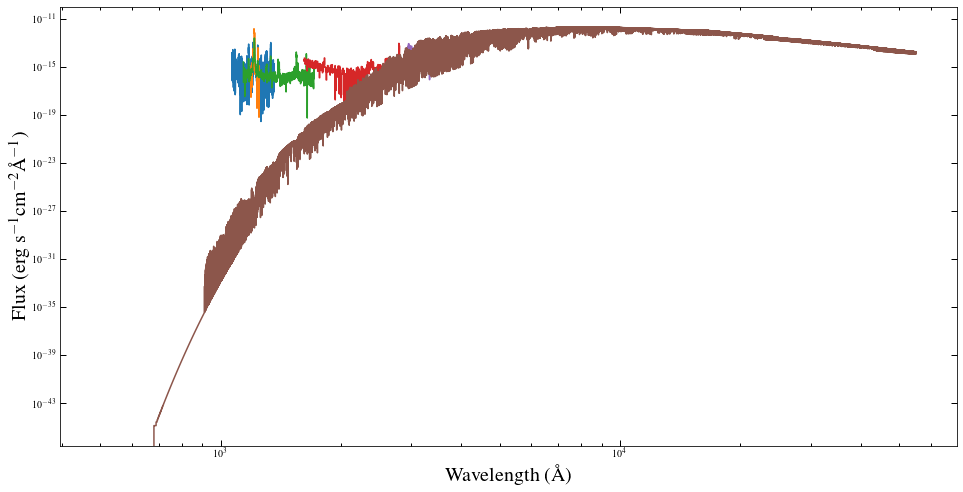

In [2]:
plt.figure(figsize = (14, 7))
plt.subplots_adjust(top = 0.98, right = 0.99, left = 0.1, bottom = 0.11)


#COS
data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
mask = data['Flux'] > 0
plt.step(data['Wave'][mask], data['Flux'][mask])


#STIS
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
mask = data['FLUX'] > 0
plt.step(data['WAVELENGTH'][mask], data['FLUX'][mask])
data = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
mask = data['FLUX'] > 0
plt.step(data['WAVELENGTH'][mask], data['FLUX'][mask])
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
mask = data['FLUX'][clip_st:clip_end] > 0
plt.step(data['WAVELENGTH'][clip_st:clip_end][mask], data['FLUX'][clip_st:clip_end][mask])
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_st, clip_end = 20,-1 #points to clip off ccd spectrum  
mask = data['FLUX'][clip_st:clip_end] > 0
plt.step(data['WAVELENGTH'][clip_st:clip_end][mask], data['FLUX'][clip_st:clip_end][mask])

#phoenix
w = fits.getdata('../PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits',0)
f = fits.getdata('../PHOENIX/lte03600-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')
mask = (w>data['WAVELENGTH'][-1])
scale = f[mask][0]/data['FLUX'][-1]
plt.step(w,f/scale, label= 'GJ674')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
#plt.savefig('GJ674_rough.png', dpi=150)

#add the solar spectrum
#sol_spec =  readsav('../../../stuff/Solar-data.idlsav')
#sw = sol_spec['wave']*10
#sf = sol_spec['flux']*100
#scale2 = max(f/scale)/max(sf)
#mask = sw > 1100 
#plt.plot(sw[mask], sf[mask]*scale2, 'k--', label='Sun (scaled)' , alpha=0.5)

#plt.savefig('GJ674_rough_wSun.png', dpi=150)
#plt.legend()

Going to get photometery and test the Phoenix model before going any further.

How far does Phoenix go- can I do KF's suggestion of adding the emission lines to a model photosphere. Ok stretchs accross the entire range, good.

Ok, let's forget about Phoenix for a while and concentrate on sicking the UV together. I'm going to transfere the uv code to a script to easily zoom etc. See uv_stick.py.

G130M 1069.0 1361.99836
G140M 1194.8030171119033 1249.3432603513886
G140L 1119.1184042991194 1715.735427461613
G230L 1615.7871091090767 3144.179933910513
G430L 2943.7951227235403 5694.747473727125


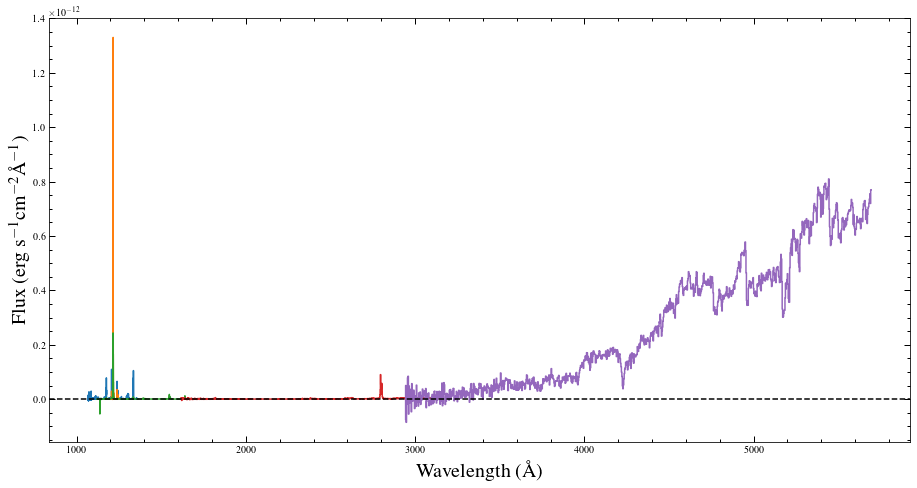

In [3]:

plt.figure(figsize = (13, 7))
plt.subplots_adjust(top = 0.95, right = 0.99, left = 0.07, bottom = 0.11)


#COS
band = 'G130M'
data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
plt.step(data['Wave'], data['Flux'])
print(band, data['Wave'][0], data['Wave'][-1])


#STIS
band = 'G140M'
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
plt.step(data['WAVELENGTH'], data['FLUX'])
print(band, data['WAVELENGTH'][0], data['WAVELENGTH'][-1])

band = 'G140L'
data = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
plt.step(data['WAVELENGTH'], data['FLUX'])
print(band, data['WAVELENGTH'][0], data['WAVELENGTH'][-1])


band = 'G230L'
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
plt.step(data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end])
print(band, data['WAVELENGTH'][clip_st:clip_end][0], data['WAVELENGTH'][clip_st:clip_end][-1])



band = 'G430L' #nb normalise to photometry, PHOENIX
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_st, clip_end = 20,-1 #points to clip off ccd spectrum  
plt.step(data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end])
print(band, data['WAVELENGTH'][clip_st:clip_end][0], data['WAVELENGTH'][clip_st:clip_end][-1])

plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
plt.axhline(0, ls='--', c='k')

plt.show()

In [4]:
#bandpasses
#G130M 1069.0 1361.99836
#G140M 1194.8030171119033 1249.3432603513886
#G140L 1119.1184042991194 1715.735427461613
#G230L 1615.7871091090767 3144.179933910513
#G430L 2943.7951227235403 5694.747473727125


Where is the COS lyman $\alpha$ gap? 1207.3-1224.2. Lets round to nearest Angstrom either side. At some point we'll need some overlap for STIS scaling as well.

COS spectrum is good right to the end, so we'll start the G140L spectrum from there. This leaves about a 0.5 A gap, but with no emmision lines so we can probably live with it.  Also will want to chop out airglow and fill with STIS.

Next is G140L to G230L. Error on G230L is much higher in the overlap, so we'll use G140L for that. Again a roughly 0.5 A gap.

Last is G430L. The uv end of G430L is terrible, so using G230L...

Looks great.

By eye there doesn't seem to be that much in the way of flux differences in the overlaps. Best check on a log scale...ok there are. Looks like G140L is the main culprit, fortunaly there's a large region of overlap with COS to fix it...next week.

To do: Fix flux differences, airglow lines, join into one spectrum, interpolate onto 1A grid, ly $\alpha$ reconstruction (Note CSF script for this in muscles/software).

(-1e-15, 5e-15)

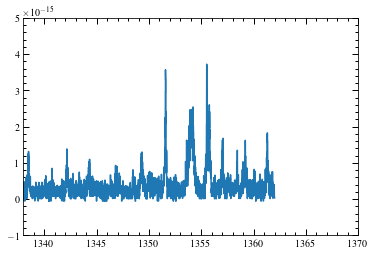

In [5]:
#flux differences
#COS
band = 'G130M'

cdata = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
lymask = (cdata['Wave'] <1207)|(cdata['Wave'] >1225) #mask out lya
plt.step(cdata['Wave'][lymask], cdata['Flux'][lymask])


band = 'G140L'
sdata = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
lymask = (sdata['WAVELENGTH'] <1207)|(sdata['WAVELENGTH']>1225)
plt.step(data['WAVELENGTH'][lymask], data['FLUX'][lymask])

#loads of emmision lines, what about that small bit after ~1350?
#lots of airglow(?), maybe sort that first?
plt.xlim(1338, 1370)
plt.ylim(-0.1e-14, 0.5e-14)

Airglow. From Loyd+16:  N i λ1134, He i λ584 at second order (1168 Å), N i λ1200, O i λ1305, and O i λ1356.

Ni 1134


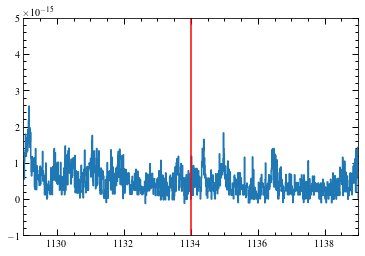

Hei 1168


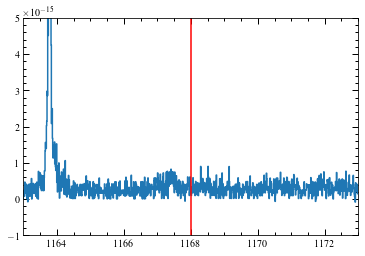

Ni 1200


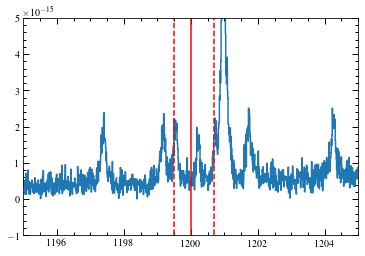

Oi 1305


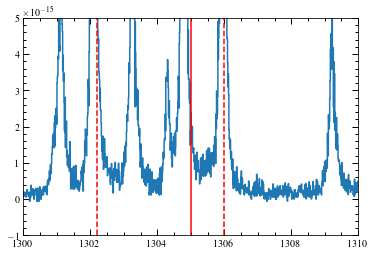

Oi 1356


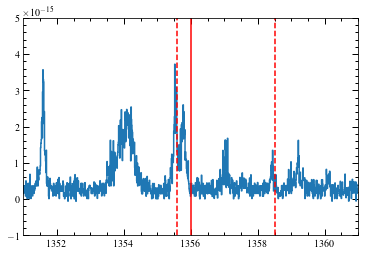

In [6]:
air_names = ['Ni','Hei','Ni','Oi','Oi']
lines = [1134,1168,1200,1305,1356]
#need to estimate line widths from uv_stick.py

bounds=  [[1199.5,1200.7],[1302.2,1306.0],[1355.6,1358.5]] #from stsci

data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
lymask = (data['Wave'] <1207)|(data['Wave'] >1225) #mask out lya

for name,line in zip(air_names,lines):
    plt.step(data['Wave'][lymask], data['Flux'][lymask])
    plt.xlim(line-5, line+5)
    plt.ylim(-0.1e-14, 0.5e-14)
    plt.axvline(line, c='r')
    for b in bounds:
        plt.axvline(b[0], c='r', ls ='--')
        plt.axvline(b[1], c='r', ls ='--')
    print(name, line)
    plt.show()



O lines- is the entire double-peaked structure airglow or just bits? None of these lines are in the STIS data (too low resolution). Let's cut the Oi lines, the Ni is too weak to worry about intergrated flux. Can cut the Oi 1356 lines with 1355- 1356, but what about the 1304 lines? Pile of Si, O lines in there.


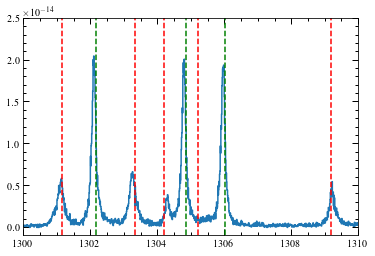

In [7]:
air_names = ['Ni','Hei','Ni','Oi','Oi']
lines = [1134,1168,1200,1305,1356]

#cuts = [[1355,1356]]

plt.step(data['Wave'][lymask], data['Flux'][lymask])
plt.xlim(1300, 1310)
plt.ylim(-0.1e-14,0.25e-13)

#OI	1302
si_lines = [1301.149,1303.323,1304.2,1305.2,1309.2]
o_lines =[1302.168, 1304.858, 1306.029]
[plt.axvline(line, c='r', ls='--') for line in si_lines]
[plt.axvline(line, c='g', ls='--') for line in o_lines]

Ok so that bump at 1304 is aiglow? Cut 1304-1304.5

Now go back and do the flux correction...

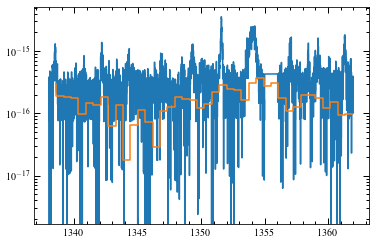

3.484706968027827e-13
2.858660698172902e-13
0.820344644298962


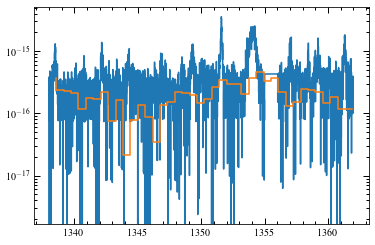

In [8]:

#flux differences
#COS
band = 'G130M'

cdata = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
glowmask = (cdata['Wave'] <1207)|(cdata['Wave'] >1225)&(cdata['Wave'] <1304)|(cdata['Wave'] >1304.5)&(cdata['Wave'] <1355)|(cdata['Wave'] >1356)   #mask out lya, airglow
#plt.step(cdata['Wave'][glowmask], cdata['Flux'][glowmask])
cw, cf = cdata['Wave'][glowmask], cdata['Flux'][glowmask]

band = 'G140L'
sdata = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
lymask = (sdata['WAVELENGTH'] <1207)|(sdata['WAVELENGTH']>1225)
#plt.step(sdata['WAVELENGTH'][lymask], sdata['FLUX'][lymask])
sw, sf = (sdata['WAVELENGTH'][lymask], sdata['FLUX'][lymask])



#plt.xlim(1338, 1370)
#plt.ylim(-0.1e-14, 0.5e-14)

#cut clip spectra down to just bit I want to compare
cut = [1338, cdata['Wave'][-1]]
ccut = (cw > cut[0]) & (cw < cut[1])
scut = (sw > cut[0]) & (sw < cut[1])
plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut])
plt.yscale('log')
plt.show()

#intergrated fluxes
c_int = np.trapz(cf,cw)
s_int =  np.trapz(sf,sw)
print(c_int)
print(s_int)
flux_ratio = s_int/c_int
print(flux_ratio)

#new plot with adjusted stis flux
plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut]/flux_ratio)
plt.yscale('log')
plt.show()

Looks reasonable. Going to apply that to the  gl40l spectrum in the big plot.

Still looks low. Think the next approach will be to do the photometry and work back into the STIS data from there, seeing if it joins up with the COS data at the other end. In the meantime, I'll integrate the airglow clipping into uv_stick.py.

20190312 what about lyalpha? Looking into CSFs NHI notebook...

20190409 Next: scaling STIS optical to model.

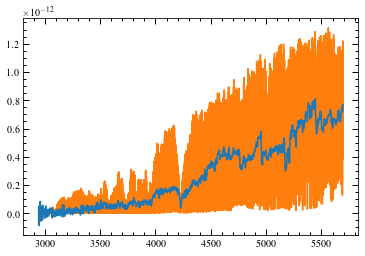

In [9]:
#G430L nb normalise to photometry, PHOENIX
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_start, clip_end = 20,-1 #don't need to clip the start any more
#mask = data['FLUX'][clipLst:clip_end] > 0
#mask = data['WAVELENGTH'][clip_start:clip_end]>g230L_end
plt.step(data['WAVELENGTH'][clip_start:clip_end], data['FLUX'][clip_start:clip_end])
w_start, w_end = data['WAVELENGTH'][clip_start:clip_end][0], data['WAVELENGTH'][clip_start:clip_end][-1]  
sw, sf = data['WAVELENGTH'][clip_start:clip_end], data['FLUX'][clip_start:clip_end]

#Phoenix
data = Table.read('../photometry/scaled_03400-4.50-0.0_phoenix_gj674.ecsv')
mask = (data['WAVELENGTH'] > w_start) & (data['WAVELENGTH'] < w_end)
mw, mf = data['WAVELENGTH'][mask], data['FLUX'][mask]
#mw, mf = data['WAVELENGTH'], data['FLUX']
plt.step(mw, mf, zorder=-10)

In [10]:
stis_int = np.trapz(sf, sw)
p_int = np.trapz(mf, mw)
print(stis_int, p_int)
print(stis_int/p_int)

7.504553110215298e-10 8.357892216524806e-10
0.8979002020841655


What if we cut off the scraggly bit at the beggining?

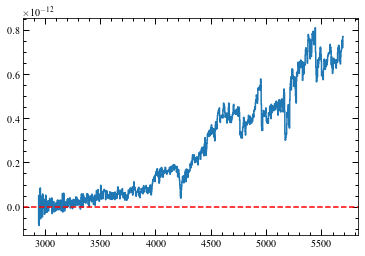

In [11]:
plt.step(sw, sf)
plt.axhline(0., c='r', ls='--')

In [12]:
cstis_int = np.trapz(sf[sw>3500], sw[sw>3500])
cp_int = np.trapz(mf[mw>3500], mw[mw>3500])
print(cstis_int, cp_int)
print(cp_int/cstis_int)

7.400183262997135e-10 8.173035822039933e-10
1.1044369485965657


Ok about the same, so we can use the original value

In [13]:
scale = p_int/stis_int

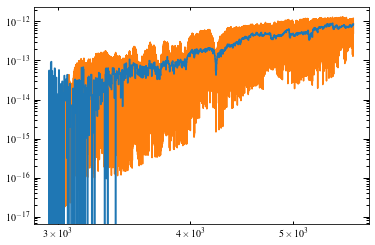

In [14]:
#G430L nb normalise to photometry, PHOENIX
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_start, clip_end = 20,-1 #don't need to clip the start any more
#mask = data['FLUX'][clipLst:clip_end] > 0
#mask = data['WAVELENGTH'][clip_start:clip_end]>g230L_end
plt.step(data['WAVELENGTH'][clip_start:clip_end], data['FLUX'][clip_start:clip_end]*scale)
w_start, w_end = data['WAVELENGTH'][clip_start:clip_end][0], data['WAVELENGTH'][clip_start:clip_end][-1]  
#sw, sf = data['WAVELENGTH'][clip_start:clip_end], data['FLUX'][clip_start:clip_end]

#Phoenix
dt = Table.read('../photometry/scaled_03400-4.50-0.0_phoenix_gj674.ecsv')
mask = (dt['WAVELENGTH'] > w_start) & (dt['WAVELENGTH'] < w_end)
mw, mf = dt['WAVELENGTH'][mask], dt['FLUX'][mask]
#mw, mf = data['WAVELENGTH'], data['FLUX']
plt.step(mw, mf, zorder=-10)

plt.xscale('log')
plt.yscale('log')

In [15]:
scale

1.1137095165797324

Adding scale = 1.11 (20190410 this is with the chi-squared, but not weighted) to all_stick

Next - go back to COS v STIS overlap and compute the scaling over a larger range.

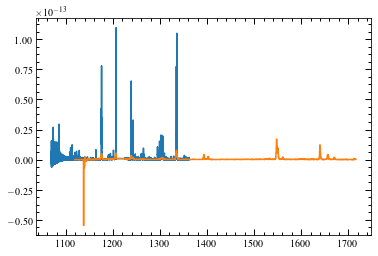

In [16]:
#flux differences
#COS
band = 'G130M'

cdata = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
glowmask = (cdata['Wave'] <1207)|(cdata['Wave'] >1225)&(cdata['Wave'] <1304)|(cdata['Wave'] >1304.5)&(cdata['Wave'] <1355)|(cdata['Wave'] >1356)   #mask out lya, airglow
plt.step(cdata['Wave'][glowmask], cdata['Flux'][glowmask])
cw, cf = cdata['Wave'][glowmask], cdata['Flux'][glowmask]

band = 'G140L'
sdata = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
lymask = (sdata['WAVELENGTH'] <1207)|(sdata['WAVELENGTH']>1225)
plt.step(sdata['WAVELENGTH'][lymask], sdata['FLUX'][lymask])
sw, sf = (sdata['WAVELENGTH'][lymask], sdata['FLUX'][lymask])



#plt.xlim(1338, 1370)
#plt.ylim(-0.1e-14, 0.5e-14)

#cut clip spectra down to just bit I want to compare
#cut = [1338, cdata['Wave'][-1]]
#ccut = (cw > cut[0]) & (cw < cut[1])
#scut = (sw > cut[0]) & (sw < cut[1])
#plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut])
#plt.yscale('log')
#plt.show()

#intergrated fluxes
#c_int = np.trapz(cf,cw)
#s_int =  np.trapz(sf,sw)
#print(c_int)
#print(s_int)
#flux_ratio = s_int/c_int
#print(flux_ratio)

#new plot with adjusted stis flux
#plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut]/flux_ratio)
#plt.yscale('log')
#plt.show()

Maybe cut from after that artifact in the STIS data at ~1150?

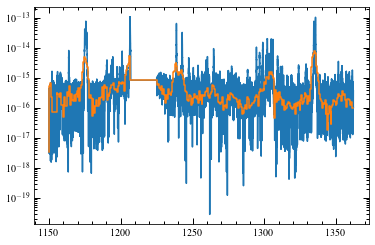

2.9524321008139987e-13
1.6474316283400996e-13
1.7921424173389076


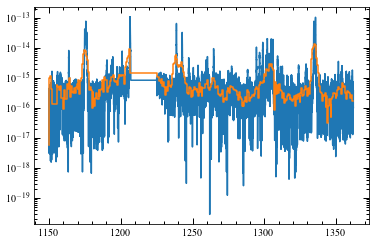

In [17]:
#cut clip spectra down to just bit I want to compare
cut = [1150, cdata['Wave'][-1]]
ccut = (cw > cut[0]) & (cw < cut[1]) & (cf > 0.0)
scut = (sw > cut[0]) & (sw < cut[1]) & (sf > 0.0)
plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut])
plt.yscale('log')
plt.show()

#intergrated fluxes
#huh original calcualation wasn't even doing the cut!
c_int = np.trapz(cf[ccut],cw[ccut])
s_int =  np.trapz(sf[scut],sw[scut])
print(c_int)
print(s_int)
flux_ratio = c_int/s_int
print(flux_ratio)

#new plot with adjusted stis flux
plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut]*flux_ratio)
plt.yscale('log')
plt.show()

Ok, lets put scale = 1.8 into all_stick

What about scaling for the NUV?

9.328313635429316e-14 7.549675772470242e-14
1.2355912911445608


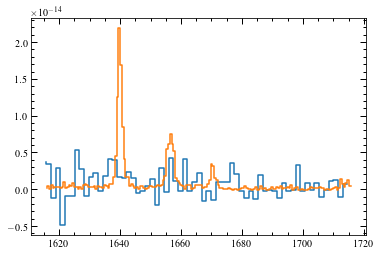

4.960857471924704e-14 5.784710264104784e-14
0.8575809756121683
5.367116e-16 1.1337544e-15 6.0584995e-16 1.8186143e-15


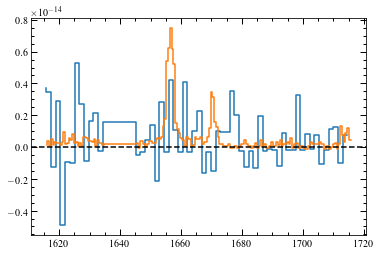

In [18]:
data = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
fw, ff = data['WAVELENGTH'], data['FLUX']
#plt.step(fw, ff)
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
nw, nf = data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end]
#plt.step(nw, nf)
#plt.axvline(fw[-1])
#plt.axvline(nw[0], c='C1')
#plt.show()
w_start, w_end = nw[0], fw[-1]
fw, ff = fw[(fw>w_start)], ff[(fw>w_start)]
nw, nf = nw[(nw<w_end)], nf[(nw<w_end)]
#plt.step(fw, ff)
plt.step(nw, nf)
#need to scale fuv by 1.8 first
plt.step(fw, ff*1.8)

f_int = np.trapz(ff*1.8, fw)
n_int = np.trapz(nf, nw)
print(f_int, n_int)
print(f_int/n_int)
plt.show()

#what if we cut that great big emission  line?
fw, ff = fw[(fw<1635)|(fw>1645)], ff[(fw<1635)|(fw>1645)] #big range to be sure to remove nuv flux
nw, nf = nw[(nw<1635)|(nw>1645)], nf[(nw<1635)|(nw>1645)]
plt.step(nw, nf)
#need to scale fuv by 1.8 first
plt.step(fw, ff*1.8)
plt.axhline(0, c='k', ls='--')

f_int = np.trapz(ff*1.8, fw)
n_int = np.trapz(nf, nw)
print(f_int, n_int)
print(f_int/n_int)
print(np.mean(ff*1.8), np.std(ff*1.8), np.mean(nf), np.std(nf))
plt.show()

cOk looks to be quite dependant on how much I take out around the emission line, but the nuv = too high seems to be correct by eye. Could test how that scales at the other end i.e. compared with the ccd data. Adding nuv_scale = 0.86 to all_stick. Looks ok on the full sed with the fuv scaling...but it's mainly just noise. Better off scaling to the ccd spetrum?

7.748670972736719e-13 1.1848713876551604e-12
1.5291285329110842


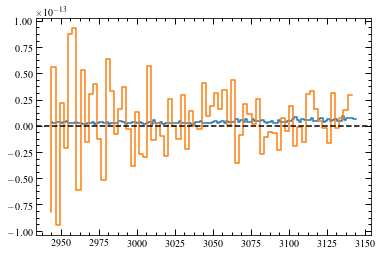

In [19]:
ccd_scale = 1.08
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_start, clip_end = 20,-1 
cw, cf = data['WAVELENGTH'][clip_start:clip_end], data['FLUX'][clip_start:clip_end]*scale
#plt.step(cw, cf)
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
nw, nf = data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end]
#plt.step(nw,nf)

w_start, w_end = cw[0], nw[-1]
nw, nf = nw[(nw>w_start)], nf[(nw>w_start)]
cw, cf = cw[(cw<w_end)], cf[(cw<w_end)]
#plt.step(fw, ff)
plt.step(nw, nf)
plt.step(cw, cf)
plt.axhline(0, c='k', ls='--')
n_int = np.trapz(nf, nw)
c_int = np.trapz(cf, cw)
print(n_int, c_int)
print(c_int/n_int)

Huh still mostly noise in the ccd spectrum. Can't just assume the same scaling either, as different optics.

Ok, let's try it with gaps in the spectrum. Run the stis fuv all the way - already do that. Formal clipping- where std < mean?

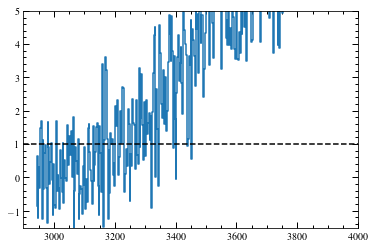

In [20]:
ccd_scale = 1.08
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_start, clip_end = 20,-1 
cw, cf, ce = data['WAVELENGTH'][clip_start:clip_end], data['FLUX'][clip_start:clip_end]*ccd_scale, data['ERROR'][clip_start:clip_end]*ccd_scale  
#plt.step(cw, cf)
#plt.step(cw, ce)
#plt.show()
plt.step(cw, cf/ce)
plt.axhline(1, ls='--', c='k')
plt.ylim(np.min(cf/ce),5)
plt.xlim(2900,4000)
#print(cw[np.argmax(ce<cf)])
#plt.axvline(cw[np.argmax(ce<cf)], ls ='--', c='k')
#have to do this by eye
plt.show()

#data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
#clip_st, clip_end = 30,-6 
#nw, nf = data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end]



Ok, looks like 3500 for the ccd, nice round number. Buuut... is that an emission line at ~3190? Bleugh that leaves an ugly gap, let's not. Add a flag for data < 0?

Need to go back and do a chi-square fit on the photometry, then onto lya/uv models.

Phoenix model does extend into the nuv, could use that for scaling instead?

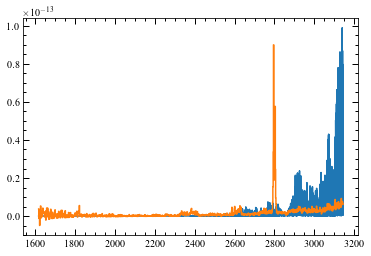

In [21]:
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
nw, nf, ne = data['WAVELENGTH'][clip_st:clip_end], data['FLUX'][clip_st:clip_end], data['ERROR'][clip_st:clip_end]
w_start, w_end = nw[0], nw[-1]

mdata = Table.read('../photometry/scaled_03400-4.50-0.0_phoenix_gj674.ecsv')
mask = (mdata['WAVELENGTH'] > w_start) & (mdata['WAVELENGTH'] < w_end)
mw, mf = mdata['WAVELENGTH'][mask], mdata['FLUX'][mask]

plt.step(mw,mf)
plt.step(nw, nf)

Where does the model lose detail? There's a step at 1195, so it should be good for all of this.

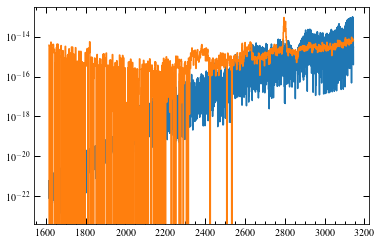

In [22]:
plt.step(mw,mf)
plt.step(nw, nf)
plt.yscale('log')

(-4.9329344e-15, 1e-14)

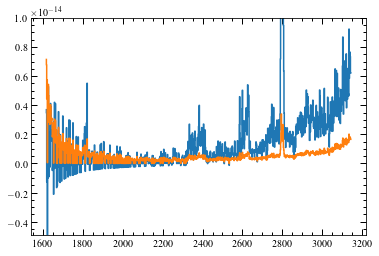

In [23]:
plt.step(nw, nf)
plt.step(nw, ne)
plt.ylim(np.min(nf),0.1e-13)

Ok let's take a cut for the scaling at 2350.

1.6827199461924445e-12 2.4230832907645007e-12
1.4399801323133448


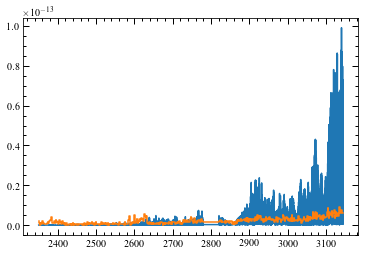

In [24]:
#plt.step(mw,mf)
#plt.step(nw, nf)
#plt.xlim(2750, 2850)
#emission line between 2780, 2820
nmask = (nw > 2350)&(nw<2780)|(nw>2820)
mmask = (mw > 2350)&(mw<2780)|(mw>2820)
plt.step(mw[mmask],mf[mmask])
plt.step(nw[nmask], nf[nmask])

n_int = np.trapz(nf[nmask], nw[nmask])
m_int = np.trapz(mf[mmask], mw[mmask])
print(n_int, m_int)
nuv_scale = m_int/n_int
print(nuv_scale)

Ok...but the model clearly dips below the spectrum before the noise limit, i.e. photosphere flux becomes chromosphere flux. Try with different cut-offs, see where it becomes ~constant.

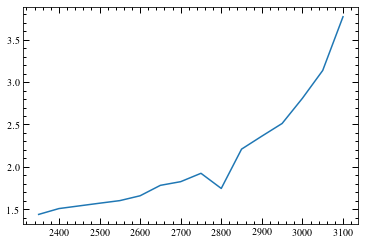

In [25]:
cuts = np.arange(2350, 3150, 50)
scales = []
for c in cuts:
    if c < 2780:
        nmask = (nw > c)&(nw<2780)|(nw>2820)
        mmask = (mw > c)&(mw<2780)|(mw>2820)
    else:
        nmask = (nw > c)
        mmask = (mw > c)

    n_int = np.trapz(nf[nmask], nw[nmask])
    m_int = np.trapz(mf[mmask], mw[mmask])
    
    nuv_scale = m_int/n_int
    scales.append(nuv_scale)
plt.plot(cuts, scales)

Well that worked about as well as a chocolate teapot. CCD is still noisy at that stage, so that doesn't help. 

In [26]:
scales

[1.4399801323133448,
 1.5088420062643852,
 1.5404888647784993,
 1.5719609331721374,
 1.6025330169831369,
 1.6597158339144376,
 1.7827103722924076,
 1.8259116190592215,
 1.924557439011228,
 1.7460355296409904,
 2.2093631002761205,
 2.362279755687095,
 2.511917667847988,
 2.8088122307190244,
 3.136589932612424,
 3.7697026161190563]

Best thing to do is take the scale at 2350 (1.43) as that's where I have something quantitative to go by (S/N >1).

Only problem spectrum now is the STIS, seems too low at both ends.

Going to make a first joined-up spectrum using just data+ phoenix model. 

In [27]:
fdt = Table.read('gj674_data+phoenix_v1.ecsv')
fdt

WAVELENGTH,FLUX,ERROR,NORMFAC
Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,float64
2.6500000953674316,4.83094357093118e-15,5.225157363264541e-15,1.0
2.7829999923706055,nan,5.415649567387876e-15,1.0
2.9070000648498535,1.9606198785261826e-14,5.4186489110541036e-15,1.0
3.0490000247955322,3.5460807755487893e-15,3.8351373333046605e-15,1.0
3.194999933242798,2.3753859935884275e-14,4.594681517986485e-15,1.0
3.382999897003174,nan,2.3588550444799284e-15,1.0
3.569000005722046,1.9201623662401177e-14,4.375096273223807e-15,1.0
3.700000047683716,1.0421621485440843e-14,3.8486487793627875e-15,1.0


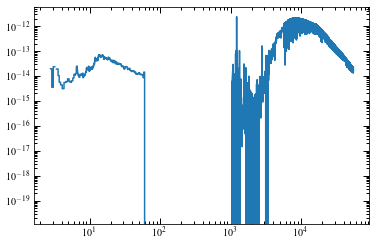

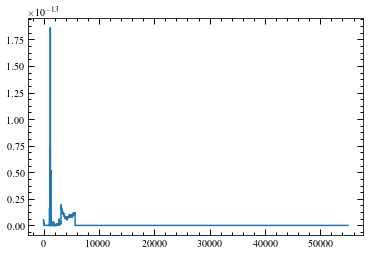

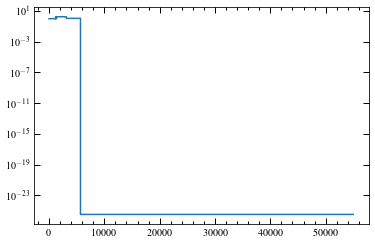

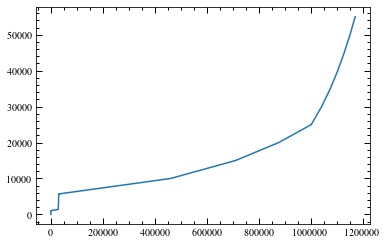

In [28]:
plt.step(fdt['WAVELENGTH'], fdt['FLUX'])
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.step(fdt['WAVELENGTH'], fdt['ERROR'])
plt.show()

plt.step(fdt['WAVELENGTH'], fdt['NORMFAC'])
plt.yscale('log')
plt.show()

plt.step(np.arange(len(fdt['WAVELENGTH'])),fdt['WAVELENGTH'] )

Ok it doesn't go backwards, but normfac hasn't saved properly? Fixed!

/home/david/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


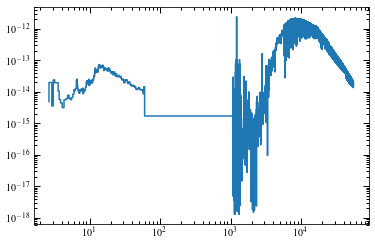

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/david/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


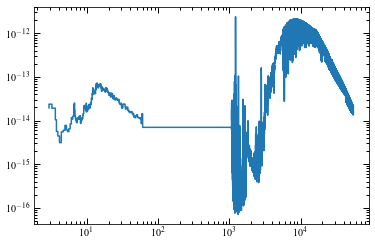

In [29]:
mask = fdt['FLUX'] >= 1e-18
plt.step(fdt['WAVELENGTH'][mask], fdt['FLUX'][mask])
#plt.step(fdt['WAVELENGTH'][mask], fdt['ERROR'][mask])
plt.xscale('log')
plt.yscale('log')
plt.show()

mask = (fdt['FLUX'] >= 1e-18)&(fdt['FLUX']/fdt['ERROR'] >1)
plt.step(fdt['WAVELENGTH'][mask], fdt['FLUX'][mask])
#plt.step(fdt['WAVELENGTH'][mask], fdt['ERROR'][mask])
plt.xscale('log')
plt.yscale('log')
plt.show()


Looking good. Next need lya calculations and EUV models. Current EUV needs Lya first. Can use the extension of the X-ray model to fill in between the x-ray and euv approximations. But done for now! 

20190412 making another plot for exoupdate

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


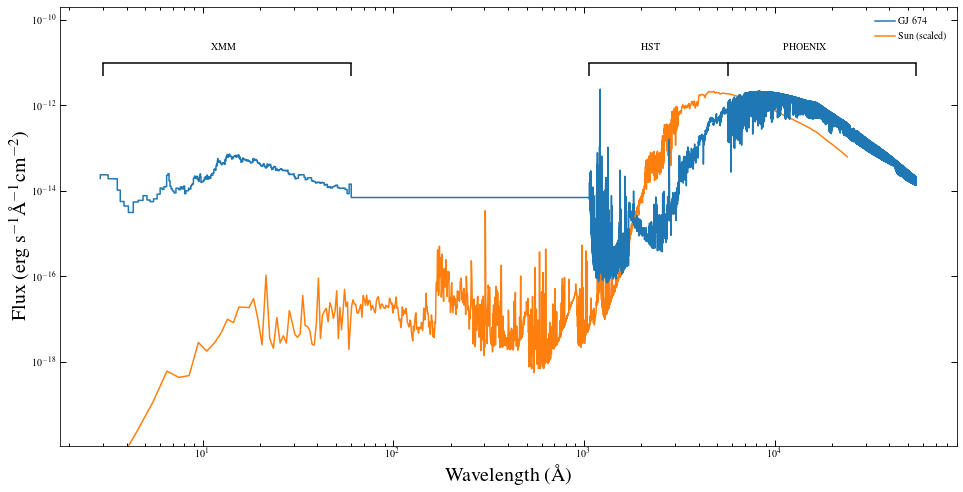

In [30]:
plt.figure(figsize = (14, 7))
plt.subplots_adjust(top = 0.98, right = 0.99, left = 0.1, bottom = 0.11)



mask = (fdt['FLUX'] >= 1e-18)&(fdt['FLUX']/fdt['ERROR'] >1)
plt.step(fdt['WAVELENGTH'][mask], fdt['FLUX'][mask], label = 'GJ 674')
#plt.step(fdt['WAVELENGTH'][mask], fdt['ERROR'][mask])
plt.xscale('log')
plt.yscale('log')


#add the solar spectrum
sol_spec =  readsav('../../../stuff/Solar-data.idlsav')
sw = sol_spec['wave']*10
sf = sol_spec['flux']*100
scale2 = max(fdt['FLUX'][fdt['WAVELENGTH']>3000])/max(sf)
mask = (sw > fdt['WAVELENGTH'][0])
#plt.plot(sw, sf*scale2, 'k--', label='Sun (scaled)' , alpha=0.5)
plt.plot(sw[mask], sf[mask]*scale2, label='Sun (scaled)' , zorder=-1)

plt.errorbar((3,60),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('XMM', (11, 2e-11))

plt.errorbar((1068, 5692),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('HST', (2000, 2e-11))

plt.errorbar((5692, 54963),(1e-11, 1e-11), yerr= [[0,5e-12],[0,0]], c ='k')
plt.annotate('PHOENIX', (11000, 2e-11))

plt.ylim(1.1e-20, 0.2e-9)
plt.legend()
plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$\AA$^{-1}$cm$^{-2}$)', size=20)

#plt.savefig('GJ674_data+phoenix_wSun.png', dpi=150)

20190417 adding Lyman alpha!

In [32]:
os.listdir('../lya/')

['GJ674_intrinsic_LyA_profile.txt',
 'GJ674_LyA_flux_histogram.png',
 'GJ674_bestfit.png',
 'GJ674_cornerplot.png',
 'relyareconstruction.zip']

In [34]:
lya = Table.read('../lya/GJ674_intrinsic_LyA_profile.txt', format='ascii')

In [41]:
#lya.rename_column('col1', 'WAVELENGTH')
#lya.rename_column('col2', 'FLUX')
lya.dtype.names

('WAVELENGTH', 'FLUX')

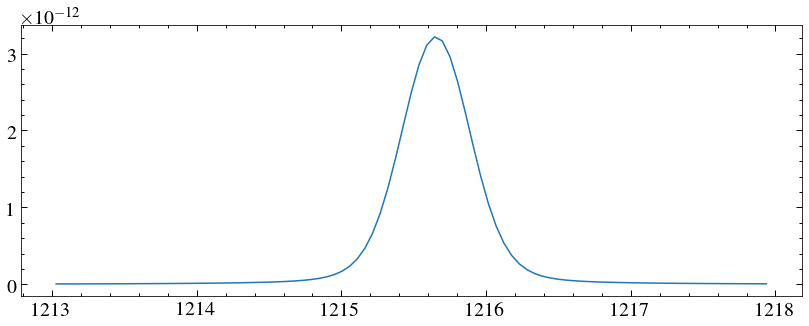

In [42]:
plt.plot(lya['WAVELENGTH'], lya['FLUX'])

(-1e-13, 1e-13)

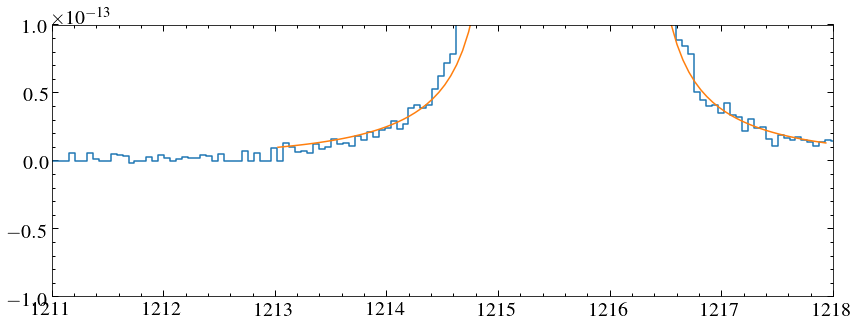

In [56]:
data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
#mask = data['Flux'] > 0
#lymask = (data['Wave'] <1207)|(data['Wave'] >1225) #mask out lya
glowmask = (data['Wave'] <1207)|(data['Wave'] >1225)&(data['Wave'] <1304)|(data['Wave'] >1304.5)&(data['Wave'] <1355)|(data['Wave'] >1356)   #mask out lya, airglow

#plt.step(data['Wave'][glowmask], data['Flux'][glowmask])
#plt.step(data['Wave'], data['Flux'])
cos_end = data['Wave'][-1]

stis_scale = 1.8 #scaled to COS data
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
#mask = data['FLUX'] > 0
lyinc = (data['WAVELENGTH'] >1207)&(data['WAVELENGTH'] <1225) #include just lya
plt.step(data['WAVELENGTH'][lyinc], data['FLUX'][lyinc]*1.8)

plt.plot(lya['WAVELENGTH'], lya['FLUX']*1.8)

plt.xlim(1211, 1218)
plt.ylim(-0.1e-12,0.1e-12) #(max(lya['FLUX'])+0.1*max(lya['FLUX'])))

Right, how do I do EUV? Done -linskey_euv.py  does the estimate. How to plot them though..

In [71]:
euv = Table.read('GJ674_euv_estimate.ecsv')

In [73]:
w1, w2, f = euv['W1'], euv['W2'], euv['FLUX']
bins = np.append(w1,w2[-1])
#print(w1,w2)
#print(bins)

[ 150.  250.  350.  450.  550.  650.  750.  856. 1041.]


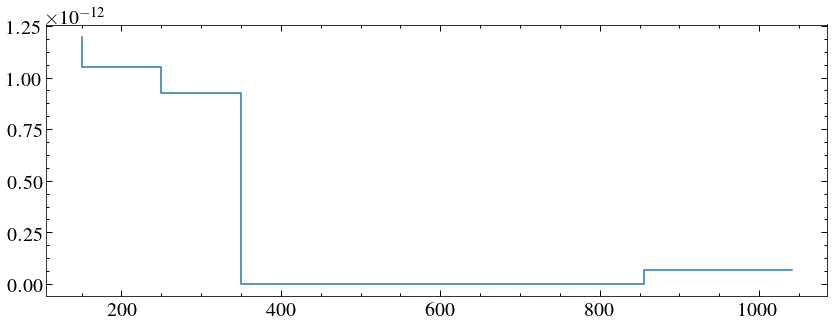

In [79]:
w = np.mean([w1, w2], axis=0)
print(w)
plt.step(w,f)

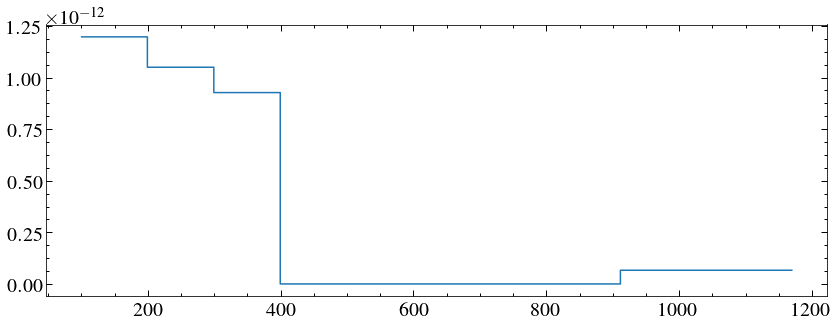

In [81]:
euv = Table.read('GJ674_1Aeuv_estimate.ecsv')
plt.step(euv['WAVELENGTH'], euv['FLUX'])

Ok these are orders of magnitude too high...fixed it, needed to divide by the bandwidth.

In [87]:
fdt = Table.read('gj674_data+models_v1.ecsv')

/home/david/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/david/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


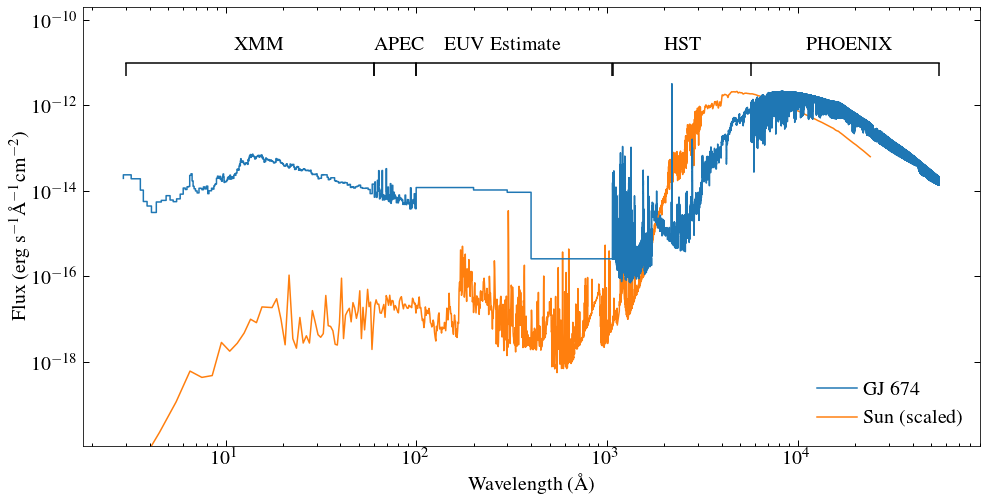

In [90]:
fdt = Table.read('gj674_data+models_v1.ecsv')

plt.figure(figsize = (14, 7))
plt.subplots_adjust(top = 0.98, right = 0.99, left = 0.1, bottom = 0.11)



mask = (fdt['FLUX'] >= 1e-18)&(fdt['FLUX']/fdt['ERROR'] >1)
plt.step(fdt['WAVELENGTH'][mask], fdt['FLUX'][mask], label = 'GJ 674')
#plt.step(fdt['WAVELENGTH'][mask], fdt['ERROR'][mask])
plt.xscale('log')
plt.yscale('log')


#add the solar spectrum
sol_spec =  readsav('../../../stuff/Solar-data.idlsav')
sw = sol_spec['wave']*10
sf = sol_spec['flux']*100
scale2 = max(fdt['FLUX'][fdt['WAVELENGTH']>3000])/max(sf)
mask = (sw > fdt['WAVELENGTH'][0])
#plt.plot(sw, sf*scale2, 'k--', label='Sun (scaled)' , alpha=0.5)
plt.plot(sw[mask], sf[mask]*scale2, label='Sun (scaled)' , zorder=-1)

plt.errorbar((3,60),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('XMM', (11, 2e-11))

plt.errorbar((60,100),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('APEC', (60, 2e-11))

plt.errorbar((100,1060),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('EUV Estimate', (140, 2e-11))

plt.errorbar((1068, 5692),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('HST', (2000, 2e-11))

plt.errorbar((5692, 54963),(1e-11, 1e-11), yerr= [[0,5e-12],[0,0]], c ='k')
plt.annotate('PHOENIX', (11000, 2e-11))

plt.ylim(1.1e-20, 0.2e-9)
plt.legend()
plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$\AA$^{-1}$cm$^{-2}$)', size=20)

plt.savefig('GJ674_wSun.png', dpi=150)

Last thing that needs doing - add bits where airglow was clipped out, model into ccd spectrum, have another look at stis scaling.

Filling in the O airglow gaps. Done with STIS G140L.

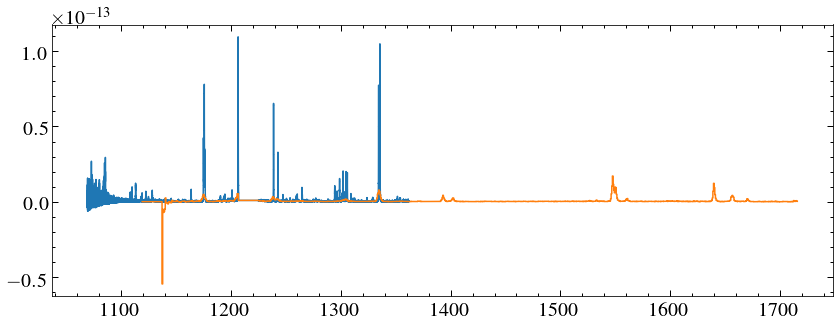

In [92]:
band = 'G130M'

cdata = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
glowmask = (cdata['Wave'] <1207)|(cdata['Wave'] >1225)&(cdata['Wave'] <1304)|(cdata['Wave'] >1304.5)&(cdata['Wave'] <1355)|(cdata['Wave'] >1356)   #mask out lya, airglow
plt.step(cdata['Wave'][glowmask], cdata['Flux'][glowmask])
cw, cf = cdata['Wave'][glowmask], cdata['Flux'][glowmask]

band = 'G140L'
sdata = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
lymask = (sdata['WAVELENGTH'] <1207)|(sdata['WAVELENGTH']>1225)
plt.step(sdata['WAVELENGTH'][lymask], sdata['FLUX'][lymask])
sw, sf = (sdata['WAVELENGTH'][lymask], sdata['FLUX'][lymask])


Think I need to cut out the airglow, might do a better scaling - no that's done. What if I smooth the COS flux- makes the scale less? Or interpolate it onto the STIS wavelength scale?

In [97]:
from scipy import interpolate
from astropy.convolution import convolve, Box1DKernel

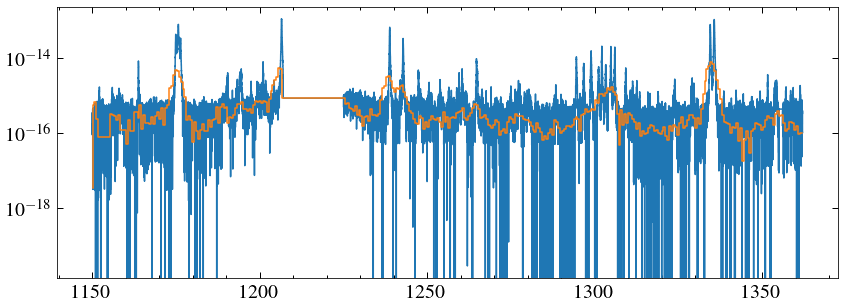

2.8878600315202775e-13
1.6474316283400996e-13
1.7529468184546115


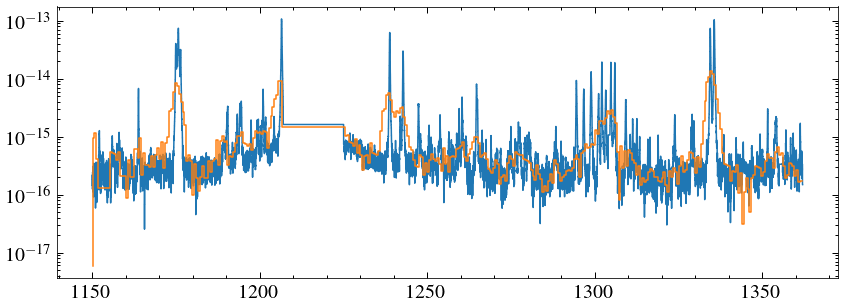

In [99]:
#cut clip spectra down to just bit I want to compare
cut = [1150, cdata['Wave'][-1]]
ccut = (cw > cut[0]) & (cw < cut[1]) #& (cf > 0.0)
scut = (sw > cut[0]) & (sw < cut[1]) & (sf > 0.0)
plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut])
plt.yscale('log')
plt.show()

cf1 = convolve(cf[ccut],Box1DKernel(5))
c_int = np.trapz(cf1,cw[ccut])
s_int =  np.trapz(sf[scut],sw[scut])
print(c_int)
print(s_int)
flux_ratio = c_int/s_int
print(flux_ratio)

#new plot with adjusted stis flux
plt.step(cw[ccut], cf1, sw[scut], sf[scut]*flux_ratio)
plt.yscale('log')
plt.show()

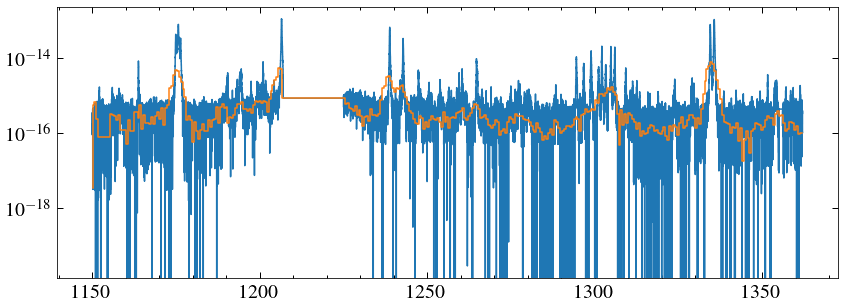

5.806046850942248e-13
1.6474316283400996e-13
3.524302162871693


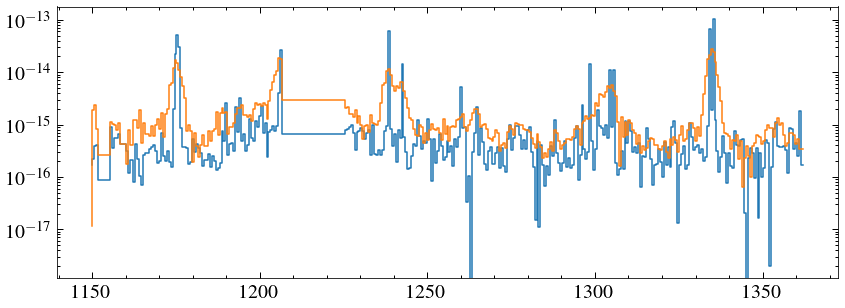

In [104]:
#cut clip spectra down to just bit I want to compare
cut = [1150, cdata['Wave'][-1]]
ccut = (cw > cut[0]) & (cw < cut[1]) #& (cf > 0.0)
scut = (sw > cut[0]) & (sw < cut[1]) & (sf > 0.0)
plt.step(cw[ccut], cf[ccut], sw[scut], sf[scut])
plt.yscale('log')
plt.show()

cf1 = interpolate.interp1d(cw[ccut], cf[ccut], fill_value='extrapolate')(sw[scut])
c_int = np.trapz(cf1,sw[scut])
s_int =  np.trapz(sf[scut],sw[scut])
print(c_int)
print(s_int)
flux_ratio = c_int/s_int
print(flux_ratio)

#new plot with adjusted stis flux
plt.step(sw[scut], cf1, sw[scut], sf[scut]*flux_ratio)
plt.yscale('log')
plt.show()

Well that... screws everything up? But feels more realistic, let's see how it fits into the rest of it. Scale =3.5 G140L looks great, Gl40M not so much. Separate normalisation factors?

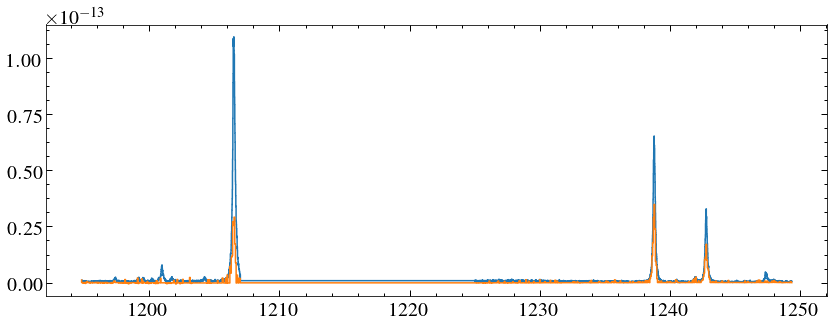

3.1387092577139994


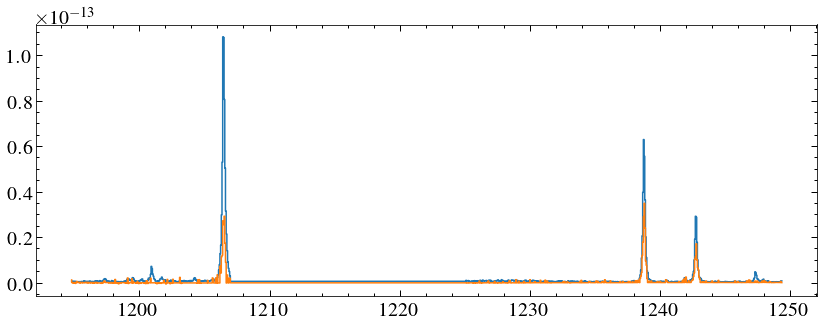

2.9225316051626997


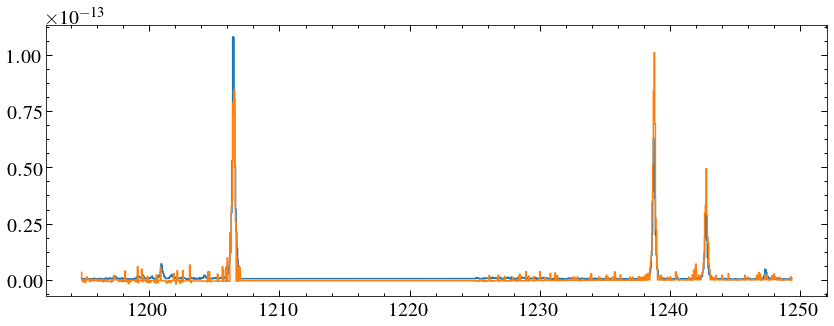

In [115]:
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
lyinc = (data['WAVELENGTH'] < 1207)|(data['WAVELENGTH'] >1225) #same mask as cos
#plt.step(data['WAVELENGTH'][lyinc], data['FLUX'][lyinc])
sw, sf = data['WAVELENGTH'][lyinc], data['FLUX'][lyinc]
ws, we = data['WAVELENGTH'][0], data['WAVELENGTH'][-1]

data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
glowmask = (data['Wave'] >ws)&(data['Wave'] <1207)|(data['Wave'] >1225)&(data['Wave'] <we)#mask out lya, airglow
cw, cf = data['Wave'][glowmask], data['Flux'][glowmask]
#plt.step(data['Wave'][glowmask], data['Flux'][glowmask])

plt.step(cw, cf) #swapping plotting to keep colour scheme
plt.step(sw, sf)
plt.show()

c_int = np.trapz(cf, cw)
s_int = np.trapz(sf, sw)
print(c_int/s_int)

cf1 = interpolate.interp1d(cw, cf, fill_value='extrapolate')(sw)

plt.step(sw, cf1) #swapping plotting to keep colour scheme
plt.step(sw, sf)
plt.show()


c_int = np.trapz(cf1, sw)
s_int = np.trapz(sf, sw)
print(c_int/s_int)

plt.step(sw, cf1) #swapping plotting to keep colour scheme
plt.step(sw, sf*2.9)
plt.show()


It's dominated by those emission lines, what if we cut them out?

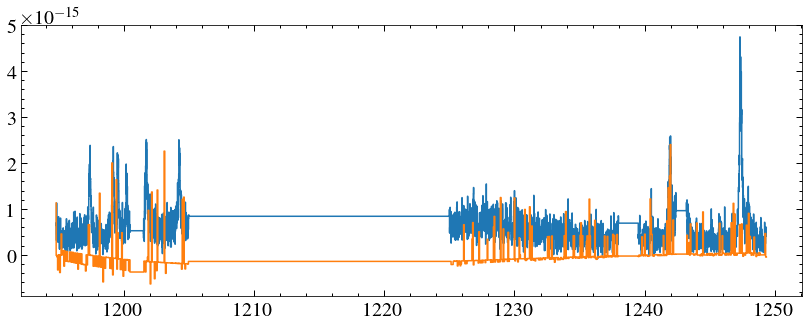

-13.355528318017747


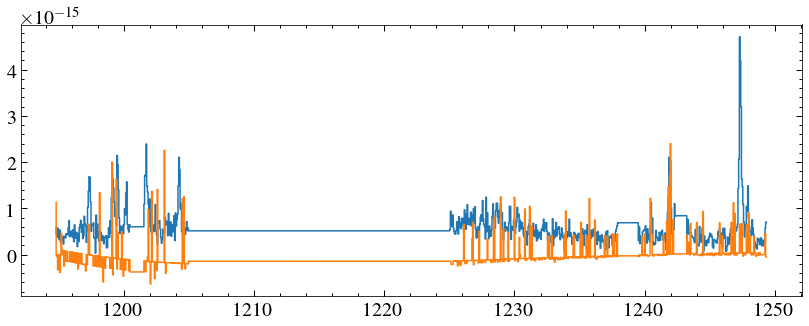

-11.13046433591897


In [114]:
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
w, f =  data['WAVELENGTH'], data['FLUX']
lyinc = (w < 1200.5)|(w>1201.5)&(w < 1205)|(w >1225)&(w<1238)|(w>1239.5)&(w<1242.4)|(w>1243.2) #same mask as cos
#plt.step(data['WAVELENGTH'][lyinc], data['FLUX'][lyinc])
sw, sf = data['WAVELENGTH'][lyinc], data['FLUX'][lyinc]
ws, we = data['WAVELENGTH'][0], data['WAVELENGTH'][-1]

data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
w, f = data['Wave'], data['Flux']
glowmask = (w >ws)&(w < 1200.5)|(w>1201.5)&(w < 1205)|(w >1225)&(w<1238)|(w>1239.5)&(w<1242.4)|(w>1243.2)&(w <we)
cw, cf = data['Wave'][glowmask], data['Flux'][glowmask]
#plt.step(data['Wave'][glowmask], data['Flux'][glowmask])

plt.step(cw, cf) #swapping plotting to keep colour scheme
plt.step(sw, sf)
plt.show()

c_int = np.trapz(cf, cw)
s_int = np.trapz(sf, sw)
print(c_int/s_int)

cf1 = interpolate.interp1d(cw, cf, fill_value='extrapolate')(sw)

plt.step(sw, cf1) #swapping plotting to keep colour scheme
plt.step(sw, sf)
plt.show()


c_int = np.trapz(cf1, sw)
s_int = np.trapz(sf, sw)
print(c_int/s_int)


Nope, lines dominate STIS flux. So 2.9 it is. Have to redo euv. Looks way better in the log plot.

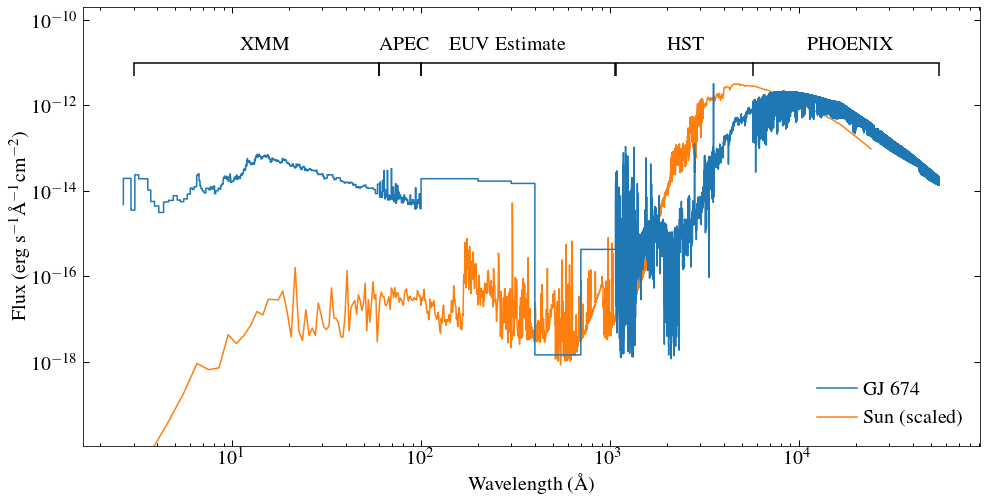

In [118]:
fdt = Table.read('gj674_data+models_v1.ecsv')

plt.figure(figsize = (14, 7))
plt.subplots_adjust(top = 0.98, right = 0.99, left = 0.1, bottom = 0.11)



mask = (fdt['FLUX'] >= 1e-18)#&(fdt['FLUX']/fdt['ERROR'] >1)
plt.step(fdt['WAVELENGTH'][mask], fdt['FLUX'][mask], label = 'GJ 674')
#plt.step(fdt['WAVELENGTH'][mask], fdt['ERROR'][mask])
plt.xscale('log')
plt.yscale('log')


#add the solar spectrum
sol_spec =  readsav('../../../stuff/Solar-data.idlsav')
sw = sol_spec['wave']*10
sf = sol_spec['flux']*100
scale2 = max(fdt['FLUX'][fdt['WAVELENGTH']>3000])/max(sf)
mask = (sw > fdt['WAVELENGTH'][0])
#plt.plot(sw, sf*scale2, 'k--', label='Sun (scaled)' , alpha=0.5)
plt.plot(sw[mask], sf[mask]*scale2, label='Sun (scaled)' , zorder=-1)

plt.errorbar((3,60),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('XMM', (11, 2e-11))

plt.errorbar((60,100),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('APEC', (60, 2e-11))

plt.errorbar((100,1060),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('EUV Estimate', (140, 2e-11))

plt.errorbar((1068, 5692),(1e-11, 1e-11), yerr= [[5e-12,5e-12],[0,0]], c ='k')
plt.annotate('HST', (2000, 2e-11))

plt.errorbar((5692, 54963),(1e-11, 1e-11), yerr= [[0,5e-12],[0,0]], c ='k')
plt.annotate('PHOENIX', (11000, 2e-11))

plt.ylim(1.1e-20, 0.2e-9)
plt.legend()
plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$\AA$^{-1}$cm$^{-2}$)', size=20)

plt.savefig('GJ674_wSun.png', dpi=150)